# K Means Clustering Algorithm from scratch--Iris Data


## Importing Dependencies

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
df=pd.read_csv('Iris.csv')
df.head()
df.sample(5)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
113  114            5.7           2.5            5.0           2.0   
79    80            5.7           2.6            3.5           1.0   
81    82            5.5           2.4            3.7           1.0   
89    90            5.5           2.5            4.0           1.3   
147  148            6.5           3.0            5.2           2.0   

             Species  
113   Iris-virginica  
79   Iris-versicolor  
81   Iris-versicolor  
89   Iris-versicolor  
147   Iris-virginica

In [117]:
data=df.drop(columns=['Species','Id'],axis=1)
data.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

In [118]:
m,n=data.shape
m,n

(150, 4)

## Choosing k=3 Clusters-Initialising centroids by taking random rows

In [ ]:
k=3
rand_ints = np.random.choice(m, size=k, replace=False)
centroids=[data.iloc[rand_ints[i]].to_numpy() for i in range(k)]
centroids

[array([6.7, 3.3, 5.7, 2.1]),
 array([5.7, 2.9, 4.2, 1.3]),
 array([6.1, 2.8, 4. , 1.3])]

In [120]:
centroids=np.array(centroids)
centroids[:5]

array([[6.7, 3.3, 5.7, 2.1],
       [5.7, 2.9, 4.2, 1.3],
       [6.1, 2.8, 4. , 1.3]])

In [121]:
ndata=data.to_numpy()
ndata[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

## Compute euclidean distances  of each row from the centroids

In [122]:
#defining euclidean distance first

def e_dist(a,b):
    return np.sqrt(np.sum(np.square(a-b)))

## Run iterations till two allocations are same

In [ ]:
prev_alloc=[-2]*m
cur_alloc=[-1]*m

In [ ]:
no_of_iterations=0
distances=[[0 for _ in range(k)] for _ in range(m)]
while prev_alloc!=cur_alloc: #iterations will stop when two consecutive allocations are same
    for i in range(m):
        for j in range(k):
            distances[i][j]=(e_dist(ndata[i],centroids[j]))
        cur_alloc[i]=np.argmin(distances[i])

    if prev_alloc!=cur_alloc:
        #update centroids- take averages of rows allocated to respective clusters
        centroids = [np.zeros_like(ndata[0]) for _ in range(k)]
        counts = [0 for _ in range(k)]

        for i in range(m):
            cluster=cur_alloc[i]
            centroids[cluster]+=ndata[i]#Sum of all rows of data belonging to ith clust
            counts[cluster]+=1
        
        for j in range(k):
            if counts[j]!=0:
                centroids[j]/=counts[j] #Mean of all rows of data belonging to ith cluster , previous loop runs j times
        
        # Prepare for next iteration
        prev_alloc=cur_alloc.copy()
        cur_alloc=[0]*m
    #increment no. of iterations to converge
    no_of_iterations+=1
no_of_iterations


## Count of allocations

In [ ]:
print(f'No. of allocations in Cluster 0: {prev_alloc.count(0)}')
print(f'No. of allocations in Cluster 1: {prev_alloc.count(1)}')
print(f'No. of allocations in Cluster 2: {prev_alloc.count(2)}')


## Add the Cluster no. to the data

In [ ]:
data['Cluster No.']=prev_alloc
data.sample(5)

In [ ]:
clustered_data=data.to_numpy()
clustered_data[:5]

## Silhoutte score for optimum no. of clusters

s(i)= [b(i)−a(i)]/max(a(i),b(i))

Where:

a(i) = average distance between 
i and other points in the same cluster (how well 
i fits into its own cluster).

b(i) = lowest average distance between 
i and points in any other cluster (how well 
i would fit into the next-best cluster).

In [ ]:
labels=prev_alloc
unique_labels=np.unique(clustered_data[:,-1])
silhouette_scores = []
for i in range(m):

    same_cluster = [j for j in range(m) if labels[j] == labels[i] and i != j] #same cluster indices
    other_clusters = [l for l in unique_labels if l != labels[i]] #different cluster labels
    
    same_cluster=np.array(same_cluster)
    other_clusters=np.array(other_clusters)
    # a(i): mean intra-cluster distance
    if len(same_cluster)>0:
        a = np.mean([e_dist(ndata[i], ndata[j]) for j in same_cluster])
    else:
        a = 0  # single point in cluster
        
    # b(i): mean minimum inter-cluster distance
    b=float('inf')
    for other_label in other_clusters:
        other_points=np.array([ndata[j] for j in range(m) if clustered_data[j,-1]==other_label])
        dist=np.mean([e_dist(ndata[i],other_point) for other_point in other_points])
        b=min(b,dist)
    
    # s(i): silhouette score for point i
    if len(same_cluster) == 0:
        s = np.nan  # or skip appending
    else:
        s = round(((b - a) / max(a, b)),3)
    silhouette_scores.append(s)
    
np.mean(silhouette_scores)

### Defining it as function

In [151]:
def silhouette_scores(labels):
    unique_labels=np.unique(clustered_data[:,-1])
    ss = []
    for i in range(m):

        same_cluster = [j for j in range(m) if labels[j] == labels[i] and i != j] #same cluster indices
        other_clusters = [l for l in unique_labels if l != labels[i]] #different cluster labels
        
        same_cluster=np.array(same_cluster)
        other_clusters=np.array(other_clusters)
        # a(i): mean intra-cluster distance
        if len(same_cluster)>0:
            a = np.mean([e_dist(ndata[i], ndata[j]) for j in same_cluster])
        else:
            a = 0  # single point in cluster
            
        # b(i): mean minimum inter-cluster distance
        b=float('inf')
        for other_label in other_clusters:
            other_points=np.array([ndata[j] for j in range(m) if clustered_data[j,-1]==other_label])
            dist=np.mean([e_dist(ndata[i],other_point) for other_point in other_points])
            b=min(b,dist)
        
        # s(i): silhouette score for point i
        if len(same_cluster) == 0:
            s = np.nan  # or skip appending
        else:
            s = round(((b - a) / max(a, b)),3)
        ss.append(s)
        
    return round(np.mean(ss),2)

## Defining entire KMeans algo as a function

In [172]:
def KMeans(k,data):
    #create a copy of data
    clustered_data=data.copy()

    #defining euclidean distance first
    def e_dist(a,b):
        return np.sqrt(np.sum(np.square(a-b)))
    
    #Getting data shape
    m,n=data.shape

    #Choosing centroids
    np.random.seed(13)  # Set seed for reproducibility
    rand_ints = np.random.choice(m, size=k, replace=False)
    centroids=[data.iloc[rand_ints[i]].to_numpy() for i in range(k)]

    #Conversion to numpy array
    ndata=data.to_numpy()

    #Run iterations
    prev_alloc=[-2]*m
    cur_alloc=[-1]*m
    no_of_iterations=0
    distances=[[0 for _ in range(k)] for _ in range(m)]
    while prev_alloc!=cur_alloc: #iterations will stop when two consecutive allocations are same
        for i in range(m):
            for j in range(k):
                distances[i][j]=(e_dist(ndata[i],centroids[j]))
            cur_alloc[i]=np.argmin(distances[i])

        if prev_alloc!=cur_alloc:
            #update centroids- take averages of rows allocated to respective clusters
            centroids = [np.zeros_like(ndata[0]) for _ in range(k)]
            counts = [0 for _ in range(k)]

            for i in range(m):
                cluster=cur_alloc[i]
                centroids[cluster]+=ndata[i]#Sum of all rows of data belonging to ith clust
                counts[cluster]+=1
            
            for j in range(k):
                if counts[j]!=0:
                    centroids[j]/=counts[j] #Mean of all rows of data belonging to ith cluster , previous loop runs j times
            
            # Prepare for next iteration
            prev_alloc=cur_alloc.copy()
            cur_alloc=[0]*m
        #increment no. of iterations to converge
        no_of_iterations+=1

    #Adding clusters to data
    clustered_data['Cluster No.']=prev_alloc
    clustered_data=clustered_data.to_numpy()
    labels=prev_alloc.copy()


    return ndata,clustered_data,labels      

In [173]:
labels.count(0),labels.count(1),labels.count(2)

(10, 20, 13)

## Invokation of KMeans 

In [174]:
df=pd.read_csv('Iris.csv')
df.head()
df.sample(5)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
87    88            6.3           2.3            4.4           1.3   
24    25            4.8           3.4            1.9           0.2   
90    91            5.5           2.6            4.4           1.2   
75    76            6.6           3.0            4.4           1.4   
132  133            6.4           2.8            5.6           2.2   

             Species  
87   Iris-versicolor  
24       Iris-setosa  
90   Iris-versicolor  
75   Iris-versicolor  
132   Iris-virginica

In [175]:
iris_data=df.drop(columns=['Species','Id'],axis=1)
iris_data.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

In [176]:
ndata,clustered_data,labels=KMeans(3,iris_data)

In [177]:
silhouette_scores(labels)

0.55

## Plot of k vs Silhoute width for optimum no. of clusters

In [180]:
K=np.arange(2,11,1)
silhoutte=[]
for k in K:
    ndata,clustered_data,labels=KMeans(k,iris_data)
    silhoutte.append(silhouette_scores(labels))
silhoutte

[0.68, 0.55, 0.5, 0.45, 0.32, 0.34, 0.34, 0.32, 0.31]

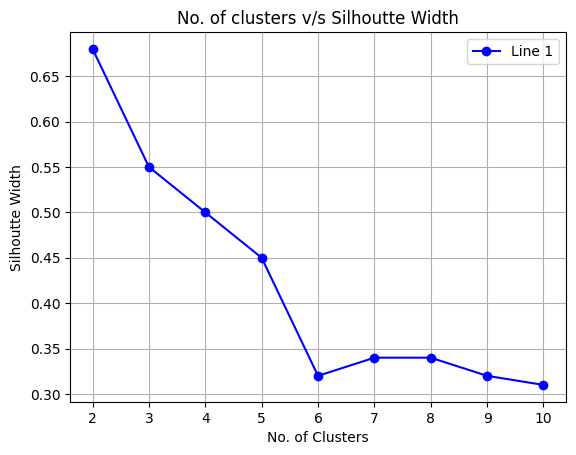

In [181]:
# Create a line plot
plt.plot(K, silhoutte, marker='o', linestyle='-', color='b', label='Line 1')

# Add titles and labels
plt.title("No. of clusters v/s Silhoutte Width")
plt.xlabel("No. of Clusters")
plt.ylabel("Silhoutte Width")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()